# Práctica 2: Modelo cinemático inverso de un manipulador y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>


| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Que son las transformaciones homogéneas?
>Las transformaciones homogéneas son matrices de 4x4 que combinan rotaciones y
traslaciones, estas permiten describir la posición y orientación de un objeto o una junta
de un robot respecto a otro sistema de coordenadas, como el de una junta anterior o
la base del robot. Con estas se pueden representar simultáneamente las operaciones
de rotación y traslación de un sistema de coordenadas de 3 dimensiones.

- ¿Que nos permite obtener el modelo de cinemática directa de un manipulador?
>Nos permite calcular la posición y orientación del efector final del manipulador, es
decir, se calcula la trama de la herramienta relativa a la trama base.

- ¿Que nos permite obtener el modelo de cinemática inversa de un manipulador?
>En la cinemática inversa dada la posición y orientación del efector final del
manipulador, se calculan todos los conjuntos posibles de ángulos articulares que
podrían utilizarse para obtener esta posición y orientación dadas.

- ¿De que formas se puede interpolar la trayectoria de un efector final entre dos puntos?
>La interpolación de la trayectoria de un efector final entre dos puntos se puede realizar
de varias maneras, dependiendo del espacio en el que se trabaje (articular o
cartesiano) y del tipo de trayectoria deseada. Se pueden interpolar los valores de las
articulaciones del manipulador (ángulos o desplazamientos lineales) directamente,
también hacer una interpolación lineal donde el efector se mueve en línea recta entre
dos puntos, interpolando posición (y opcionalmente orientación) con incremento
constante. De igual forma, se puede hacer una interpolación en el espacio cartesiano
donde se define la trayectoria deseada del efector en el espacio 3D (posición y
orientación), y luego se calcula la cinemática inversa para obtener las configuraciones
articulares necesarias.

## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p2_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [1]:
from sympy import symbols, Matrix, diff, solve, lambdify, pi
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#ACTIVIDAD 1 - CINEMATICA DIRECTA
#!/usr/bin/env python3 
class GeneradorTrayectoria():
  def __init__(self, dim = (0.3, 0.3, 0.3)):
    self.dim = dim
  def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T 
  def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x z th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[2, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])
      
generador_trayectoria = GeneradorTrayectoria()
generador_trayectoria.cinematica_directa()

Generando cinematica directa


### 2. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


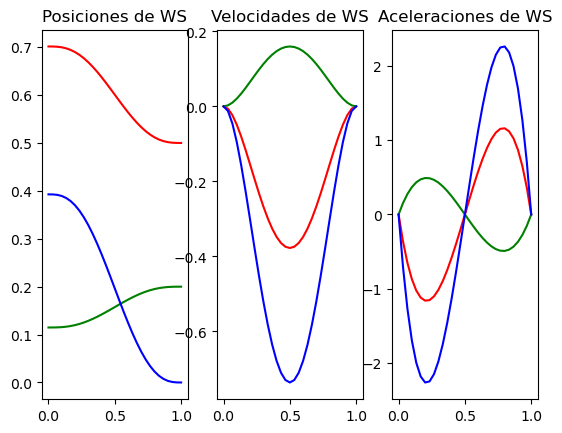

In [13]:
#ACTIVIDAD 2 - TRAYECTORIA
def generar_trayectoria_ex(self, q_in=(pi/4, -pi/2, 3*pi/8), xi_fn=(0.5, 0.2, 0), tie=(0, 1), frec=30):
    print("Creando trayectoria")
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols("t a_0 a_1 a_2 a_3 a_4 a_5")
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * self.t**2 + self.a_3 * self.t**3 + self.a_4 * self.t**4 + self.a_5 * self.t**5
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)

    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6],
                    [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict=True)

    self.lam_s = self.lam.subs(terminos[0])
    self.lam_dot_s = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s = self.lam_dot_dot.subs(terminos[0])

    xi_in = self.xi_0_P.subs({
        self.theta_0_1: q_in[0],
        self.theta_1_2: q_in[1],
        self.theta_2_3: q_in[2]
    })

    self.xi = Matrix([
        [self.lam_s * (xi_fn[0] - xi_in[0]) + xi_in[0]],
        [self.lam_s * (xi_fn[1] - xi_in[1]) + xi_in[1]],
        [self.lam_s * (xi_fn[2] - xi_in[2]) + xi_in[2]]
    ])
    self.xi_dot = Matrix([
        [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
        [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
        [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    self.xi_dot_dot = Matrix([
        [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
        [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
        [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])

    print("Vector segunda derivada")
    print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)

    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0, 0] = tie[0]
    for a in range(self.muestras - 1):
        self.t_m[0, a + 1] = self.t_m[0, a] + self.dt
    self.xi_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    xi_m_func = lambdify([self.t], self.xi)
    xi_dot_m_func = lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)

    for a in range(self.muestras):
        self.xi_m[:, a] = xi_m_func(float(self.t_m[0, a]))
        self.xi_dot_m[:, a] = xi_dot_m_func(float(self.t_m[0, a]))
        self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
        print(a)

    self.q_in = q_in

def graficar_ws_ex(self):
    fig, ((xi_g, xi_dot_g, xi_dot_dot_g)
              ) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(self.t_m.T, self.xi_m[0, :].T, color = "RED")
    xi_g.plot(self.t_m.T, self.xi_m[1, :].T, color = "GREEN")
    xi_g.plot(self.t_m.T, self.xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[0, :].T, color = "RED")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(self.t_m.T, self.xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[0, :].T, color = "RED")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(self.t_m.T, self.xi_dot_dot_m[2, :].T, color = "BLUE")


GeneradorTrayectoria.generar_trayectoria_in = generar_trayectoria_ex
GeneradorTrayectoria.graficar_ws_in = graficar_ws_ex
generador_trayectoria = GeneradorTrayectoria()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria_in()
generador_trayectoria.graficar_ws_in()

### 3. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [9]:
#ACTIVIDAD 3 - CINEMÄTICA INVERSA
def cinematica_inversa_ex(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    self.q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    self.q_dot_m[:, 0] = self.q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )

GeneradorTrayectoria.cinematica_inversa_in = cinematica_inversa_ex
generador_trayectoria = GeneradorTrayectoria()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria_in()
generador_trayectoria.cinematica_inversa_in()

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa


### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

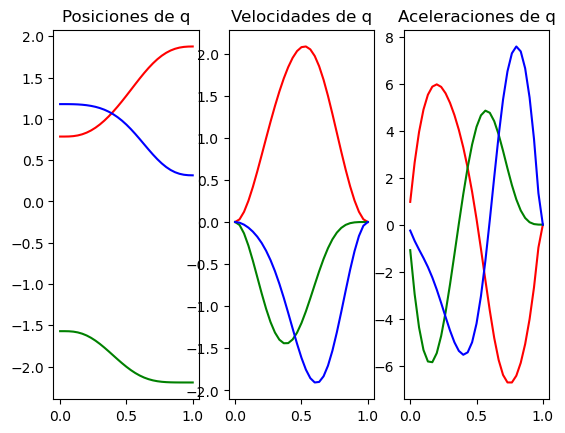

In [14]:
#ACTIVIDAD 4
def calcular_trayectoria_ex(self):
    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      self.q_dot_m[:, a + 1] = self.q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)

def graficar_q_ex(self):
    fig, ((q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones q
    q_g.set_title("Posiciones de q")
    q_g.plot(self.t_m.T, self.q_m[0, :].T, color = "RED")
    q_g.plot(self.t_m.T, self.q_m[1, :].T, color = "GREEN")
    q_g.plot(self.t_m.T, self.q_m[2, :].T, color = "BLUE")

    # Velocidades q
    q_dot_g.set_title("Velocidades de q")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[0, :].T, color = "RED")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[1, :].T, color = "GREEN")
    q_dot_g.plot(self.t_m.T, self.q_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones q
    q_dot_dot_g.set_title("Aceleraciones de q")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[0, :].T, color = "RED")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[1, :].T, color = "GREEN")
    q_dot_dot_g.plot(self.t_m.T, self.q_dot_dot_m[2, :].T, color = "BLUE")

GeneradorTrayectoria.calcular_trayectoria_in = calcular_trayectoria_ex
GeneradorTrayectoria.graficar_q_in = graficar_q_ex
generador_trayectoria = GeneradorTrayectoria()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria_in()
generador_trayectoria.cinematica_inversa_in()
generador_trayectoria.calcular_trayectoria_in()
generador_trayectoria.graficar_q_in()


### 5. Aplicación de la cinemática inversa
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

- ¿Qué utilidad tuvo usar el modelo de cinemática inversa de un robot?
> Es útil para determinar los ángulos y posiciones de las juntas del robot que permiten
que este pueda alcanzar una posición y orientación especificas.

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> El modelo de cinemática inversa permite calcular los valores articulares necesarios
para que el efector final alcance una posición y orientación deseadas en el espacio.
Importante para la planificación de trayectorias, el control de movimientos, la
interacción con el entorno y la programación de tareas en coordenadas cartesianas.
Además, facilita la simulación, el control en tiempo real y la integración con interfaces
hombre-máquina, haciendo posible que el robot realice tareas precisas y
automatizadas en aplicaciones industriales, médicas o de servicio.





## Conclusiones

> Las transformaciones homogéneas son fundamentales en el análisis y control de
manipuladores robóticos, ya que permiten calcular la posición y orientación del
efector final con respecto a sus juntas, facilitando así la planificación de los
movimientos necesarios para alcanzar un punto objetivo. La cinemática inversa
complementa este proceso al determinar cómo deben actuar las juntas para seguir
una trayectoria deseada, y el control preciso de las condiciones iniciales y finales
garantiza movimientos suaves y eficientes. La interpolación mediante splines
contribuye a generar trayectorias continuas y estables, mejorando la precisión del
desplazamiento. Además, el uso de plataformas colaborativas como GitHub es clave
en el desarrollo de sistemas robóticos y programación, al ofrecer control de versiones,
respaldo y organización de proyectos, lo que favorece una ejecución ordenada desde
el diseño hasta el mantenimiento.

## Bibliografía 

> En caso de usarse, se deben hacer referencia a la información implementada en formato ieee


